# Kalman Filter


#### Authors:
v1.0 (2017 Spring) Kamil Nar, Kabir Chandrasekher, David Wang, Tavor Baharav, Sinho Chewi, Kannan Ramchandran

v1.1 (2017 Fall) Sinho Chewi, Avishek Ghosh, Chen Meng, Abhay Parekh, and Jean Walrand


## Introduction

When the dynamics of a system can be described with a linear model, and the unknown factors enter into the system as additive Gaussian noise, the minimum mean-square error (MMSE) estimate of the state of the system can be computed with a Kalman filter very efficiently. Kalman filters are widely used in many applications, including object tracking, motion planning, navigation and computer vision.

<img src="https://plus.maths.org/content/sites/plus.maths.org/files/articles/2012/filters/trajectory.jpg" alt="auction diagram" style="width:450px;">

## 1) Scalar Kalman Filter
In this section, we will implement a scalar Kalman filter for the water level in a tank.

Consider a water tank as shown in the figure.

<img src="water_tank.png" style="width:240px;">

State $X(n)$ denotes the water level at time $n$, and $u$ denotes the amount of water flowing into the tank, which we assume to be a constant. Between time $n$ and $n+1$, certain portion of the water is lost through the hole at the bottom of the tank. As a result, we model this system as

$$ X(n+1) = a X(n) + b u + V(n), $$

where $a \in (0,1)$ and $b \in (0, \infty)$ are some constants, and $V(n)$ is a Gaussian random variable with mean 0 and variance $\sigma_V^2$ and independent of $\{X(j)\}_{j=0}^n$ and $\{V(j)\}_{j=0}^{n-1}$.

We monitor the water level with a sensor which gives noisy measurements:

$$ Y(n) = X(n) + W(n),$$

where $W(n)$ is a Gaussian random variable with mean 0 and variance $\sigma_W^2$ and independent of $\{X(j)\}_{j=0}^n$, $\{V(j)\}_{j=0}^n$, and $\{W(j)\}_{j=0}^{n-1}$. 

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1 (a) Predict and Update Functions
Let $\hat{\ X}(n+1 \mid n)$ and $\hat{\ X}(n\mid n)$ denote the MMSE estimates of $X(n+1)$ and $X(n)$, respectively, given $\{Y(j)\}_{j=0}^n$; and let $\sigma^2_{n+1\mid n}$ and $\sigma^2_{n\mid n}$ denote the variances of the errors. (Note that $\hat{\ X}(n\mid n)$, $\sigma^2_{n\mid n}$ and $\sigma^2_{n+1\mid n}$ correspond to $\hat{\ X}(n)$, $\Sigma_n$ and $S_{n+1}$, respectively, given in Chapter 7.6 of Walrand's textbook.)

Assuming $b = 1$, write a function named <span style="color:blue; font-family:Courier">predict</span> which takes the estimate at time $n$, $\hat{\ X}(n\mid n), \sigma^2_{n\mid n}, \sigma^2_V, a$ and $u$ as input, and gives $\hat{\ X}(n+1\mid n)$ and $\sigma^2_{n+1\mid n}$ as output.

In [2]:
def predict(X, var_n, var_v, a, u):
    return a * X + u, (a ** 2) * var_n + var_v

Now write another function named <span style="color:blue; font-family:Courier">update</span> which takes $\hat{\ X}(n+1\mid n), Y(n+1), \sigma_{n+1\mid n}^2$ and $\sigma_W^2$ as input, and gives $\hat{\ X}(n+1\mid n+1)$ and $\sigma^2_{n+1\mid n+1}$ as output.

In [3]:
def update(X, Y, var_n, var_w):
    K_n = var_n / (var_n + var_w)
    return X + K_n * (Y - X), (1 - K_n) * var_n

### 1 (b) Low-Noise Measurements

First, let's assume $a=0.9$, $u=2$, $X(0) = 11.5$, $\sigma_V^2 = 3$, $\sigma_W^2 = 0.4$ and generate some measurements.

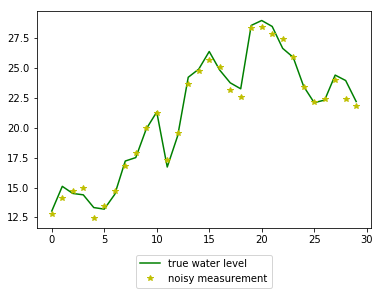

In [4]:
a = 0.9
u = 2.0
x_n = 11.5
sigma_v = np.sqrt(3.0)
sigma_w = np.sqrt(0.4)
x_true = np.zeros(30)
y = np.zeros(30)
t = range(30)
for n in t:
    x_n = a * x_n + u + np.random.normal(0.0, sigma_v, 1)
    x_true[n] = x_n
    y[n] = x_n + np.random.normal(0.0, sigma_w, 1)
plt.plot(t, x_true, "g", label="true water level")
plt.plot(t, y, "y*", label="noisy measurement")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

Now assume $\hat{\ X}(0\mid 0) \sim \mathcal N(10, 2)$ and find the estimates $\hat{\ X}(n\mid n)$ and their standard deviation $\sigma_{n\mid n}$ for $n \in \{1,2, \dots , 30\}$ by using the <span style="color:blue; font-family:Courier">predict</span> and <span style="color:blue; font-family:Courier">update</span> functions you wrote. Save them in the arrays <span style="font-family:Courier">x_est</span> and <span style="font-family:Courier">sigma_est</span> of length 30.

In [6]:
x_est = np.zeros(30)
sigma_est = np.zeros(30)
var_v = sigma_v ** 2
var_w = sigma_w ** 2
for n in range(30):
    # your code here
    # keep x_est[n] and sigma_est[n]
    # for all n from 0 to 29
    if n == 0:
        x_pred, var_pred = predict(10, 2, var_v, a, u)
        x_upd, var_upd = update(x_pred, y[n], var_pred, var_w)
        x_est[n] = x_upd
        sigma_est[n] = np.sqrt(var_upd)
    else:
        x_pred, var_pred = predict(
            x_est[n - 1], np.square(sigma_est[n - 1]), var_v, a,u)
        x_upd, var_upd = update(x_pred, y[n], var_pred, var_w)
        x_est[n] = x_upd
        sigma_est[n] = np.sqrt(var_upd)

Let's compare the true values of the states, measurements, and the estimates given by the Kalman filter.

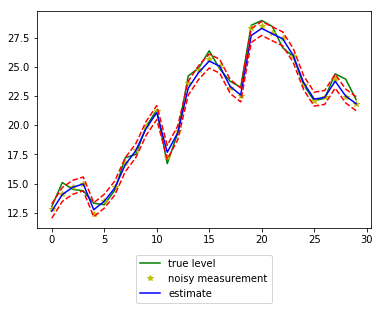

In [7]:
t = range(30)
plt.plot(t, x_true, "g", label="true level")
plt.plot(t, y, "y*", label="noisy measurement")
plt.plot(t, x_est, "b", label="estimate")
plt.plot(t, x_est + sigma_est, "r--", t, x_est - sigma_est, "r--")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

Note that the width of the region between the red dashed lines indicate how good your estimate is: the narrower, the better.

### 1 (c) Large-Noise Measurements

Now let's assume $a = 0.3$, $u = 14$, $X(0) = 9.0$, $\sigma_V^2 = 0.5$, $\sigma_W^2 = 3$ and generate some measurements.

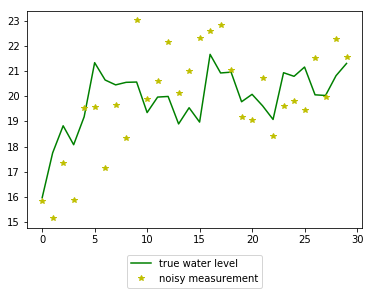

In [8]:
a = 0.3
u = 14.0
x_n = 9.0
sigma_v = np.sqrt(0.5)
sigma_w = np.sqrt(3.0)
x_true = np.zeros(30)
y = np.zeros(30)
t = range(30)
for n in t:
    x_n = a * x_n + u + np.random.normal(0.0, sigma_v, 1)
    x_true[n] = x_n
    y[n] = x_n + np.random.normal(0.0, sigma_w, 1)
plt.plot(t, x_true, "g", label="true water level")
plt.plot(t, y, "y*", label="noisy measurement")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

As you did in part (b), assume $\hat{\ X}(0\mid 0) \sim \mathcal N(10, 2)$ and find the estimates $\hat{\ X}(n\mid n)$ and their standard deviation $\sigma_{n\mid n}$ for $n \in \{1,2, \dots , 30\}$ by using the <span style="color:blue; font-family:Courier">predict</span> and <span style="color:blue; font-family:Courier">update</span> functions you wrote. Save them in the arrays <span style="font-family:Courier">x_est</span> and <span style="font-family:Courier">sigma_est</span> of length 30.

In [9]:
x_est = np.zeros(30)
sigma_est = np.zeros(30)
var_v = sigma_v ** 2
var_w = sigma_w ** 2
for n in range(30):
    if n == 0:
        x_pred, var_pred = predict(10, 2, var_v, a, u)
        x_upd, var_upd = update(x_pred, y[n], var_pred, var_w)
        x_est[n] = x_upd
        sigma_est[n] = np.sqrt(var_upd)
    else:
        x_pred, var_pred = predict(
            x_est[n - 1], np.square(sigma_est[n - 1]), var_v, a, u)
        x_upd, var_upd = update(x_pred, y[n], var_pred, var_w)
        x_est[n] = x_upd
        sigma_est[n] = np.sqrt(var_upd)

Plot the true values of the states, measurements, and the state estimates given by the Kalman filter.

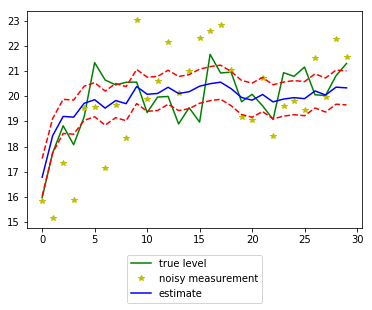

In [10]:
t = range(30)
plt.plot(t, x_true, "g", label="true level")
plt.plot(t, y, "y*", label="noisy measurement")
plt.plot(t, x_est, "b", label="estimate")
plt.plot(t, x_est + sigma_est, "r--", t, x_est - sigma_est, "r--")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

While updating the estimate, the effect of each measurement on the state estimate is different in Part (b) and Part (c). Explain this difference quantitatively.

<b>  Since $a$ and $\sigma_V^2$ are larger and $\sigma_W^2$ is smaller in Part (b), the Kalman gain $K_n$ is larger in Part (b) and the estimate changes more with each new measurement. </b>

## 2) Tracking an Object

In this section, we will implement a two-dimensional Kalman filter to track an object.

Let $X_1(n)$ and $X_2(n)$ denote the position and the velocity of an object at time $n$. We assume that the position is given in meters, the velocity is in meters-per-second, and a new measurement is taken every second. Therefore, we model the dynamics of the object as

$$ \underbrace{ \begin{bmatrix} X_1(n+1) \\ X_2(n+1) \end{bmatrix} }_{X(n+1)} = \underbrace{\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} }_{A} \underbrace{\begin{bmatrix} X_1(n) \\ X_2(n) \end{bmatrix} }_{X(n)} + \underbrace{ \begin{bmatrix} V_1(n) \\ V_2(n) \end{bmatrix} }_{V(n)} $$

where $V(n) \sim \mathcal N(0, \Sigma_V)$ and independent of $\{X(j)\}_{j=0}^n$ and $\{V(j)\}_{j=0}^{n-1}$.

At each time step, we obtain a noisy measurement of the position and the velocity of the object:

$$ Y(n) = \begin{bmatrix} Y_1(n) \\ Y_2(n) \end{bmatrix} =  \underbrace{ \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} }_{C} X(n)  + \underbrace{ \begin{bmatrix} W_1(n) \\ W_2(n) \end{bmatrix} }_{W(n)} $$

where $W(n) \sim \mathcal N(0, \Sigma_W)$ and independent of $\{X(j)\}_{j=0}^n$, $\{V(j)\}_{j=0}^{n}$, and $\{W(j)\}_{j=0}^{n-1}$.

### 2 (a) Standard Kalman Filter
Let $\hat{\ X}(n\mid n)$ and $\hat{\ X}(n+1\mid n)$ denote the MMSE estimates of $X(n)$ and $X(n+1)$, respectively, given $\{Y(j)\}_{j=0}^n$; and let $\Sigma_{n\mid n}$ and $\Sigma_{n+1\mid n}$ denote the covariance matrices of the errors.

(Note that $\hat{\ X}(n\mid n)$, $\Sigma_{n\mid n}$ and $\Sigma_{n+1\mid n}$ correspond to $\hat{\ X}(n)$, $\Sigma_n$ and $S_{n+1}$, respectively, given in Chapter 7.6 of Walrand's textbook.)

Then the update and predict steps of the Kalman filter for the system
$$ X(n+1) = A X(n) + V(n) $$
$$ Y(n) = C X(n) + W(n)$$
are described as:
<ul>
<li> Predict:
$$\begin{align*}
\hat{\ X}(n+1\mid n) &= A \hat{\ X}(n\mid n) \\
\Sigma_{n+1\mid n} &= A \Sigma_{n\mid n} A^{\mathsf{T}} + \Sigma_V
\end{align*}$$
</li>
<li> Update:
$$\begin{align*}
K_{n+1} &= \Sigma_{n+1\mid n}C^{\mathsf{T}}( C \Sigma_{n+1 \mid n} C^\mathsf{T} + \Sigma_W )^{-1} \\
\hat{\ X}(n+1\mid n+1) &= \hat{\ X}(n+1\mid n) + K_{n+1}\bigl( Y(n+1) - C \hat{\ X}(n+1\mid n) \bigr) \\
\Sigma_{n+1\mid n+1} &= (I - K_{n+1}C)\Sigma_{n+1 \mid n}
\end{align*}$$
</li> 
</ul>

Now write a function named <span style="color:blue; font-family:Courier">predict2</span> which takes $A$, $\Sigma_V$, $\hat{\ X}(n\mid n)$, $\Sigma_{n\mid n}$ as input and gives $\hat{\ X}(n+1\mid n)$, $\Sigma_{n+1\mid n}$ as output.

In [11]:
def predict2(A, Sigma_v, X, Sigma_n):
    return np.dot(A, X), np.dot(A, np.dot(Sigma_n, A.T)) + Sigma_v

And write a function named <span style="color:blue; font-family:Courier">update2</span> which takes $C, \Sigma_W, \hat{\ X}(n+1\mid n), Y(n+1), \Sigma_{n+1\mid n}$ as input and gives $\hat{\ X}(n+1\mid n+1)$, $\Sigma_{n+1\mid n+1}$ as output.

In [12]:
def update2(C, Sigma_w, X, Y, Sigma_n):
    K = np.dot(
        np.dot(Sigma_n, C.T),
        np.linalg.inv(np.dot(C, np.dot(Sigma_n, C.T)) + Sigma_w))
    X_update = X + np.dot(K, Y - np.dot(C, X))
    Sigma_update = np.dot(np.eye(2) - np.dot(K, C), Sigma_n)
    return X_update, Sigma_update

### 2 (b) Testing the 2-Dimensional Kalman Filter
Let's generate a trajectory for the object with $X(0) = \begin{bmatrix} 10 \\ 4 \end{bmatrix}$, $\color{red}{\Sigma_V = \begin{bmatrix} 4& 0 \\ 0 & 8 \end{bmatrix}}$, and $\color{red}{\Sigma_W = \begin{bmatrix} 4& 0 \\ 0 & 8 \end{bmatrix}}$.

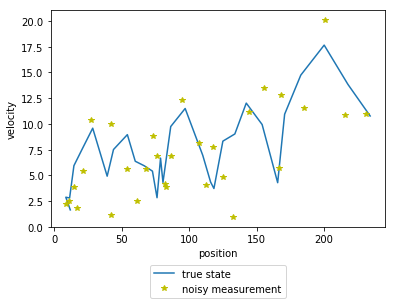

In [13]:
A = np.array([[1, 1], [0, 1]])
C = np.array([[1, 0], [0, 1]])
Sigma_v = np.array([[4, 0], [0, 8]])
Sigma_w = np.array([[4, 0], [0, 8]])
mean_vec = [0, 0]
x_true = np.zeros((2, 30))
y = np.zeros((2, 30))
x = np.array([10, 4])
t = range(30)
for n in t:
    x = A.dot(x) + np.random.multivariate_normal(mean_vec, Sigma_v)
    x_true[:, n] = x
    y[:, n] = x + np.random.multivariate_normal(mean_vec, Sigma_w)

plt.plot(x_true[0, :], x_true[1, :], label="true state")
plt.plot(y[0, :], y[1, :], "y*", label="noisy measurement")
plt.xlabel("position")
plt.ylabel("velocity")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))

Note that as long as the velocity of the object stayed positive, the object moved in the positive direction.

Now find the estimates $\{\hat{\ X}(n\mid n)\}_{n=1}^{30}$ using your functions <span style="color:blue; font-family:Courier">predict2</span> and <span style="color:blue; font-family:Courier">update2</span> with the observations $\{Y(n)\}_{n=1}^{30}$ and

$$A = \begin{bmatrix} 1& 1 \\ 0 & 1 \end{bmatrix}, \ 
C = \begin{bmatrix} 1& 0 \\ 0 & 1 \end{bmatrix}, \ 
\hat{\ X}(0\mid 0) \sim \mathcal N \Bigl(  \begin{bmatrix} 11 \\ 4 \end{bmatrix}, 
 \begin{bmatrix} 3& 0 \\ 0 & 2 \end{bmatrix} \Bigr), \
\color{red}{\Sigma_V = \begin{bmatrix} 4& 0 \\ 0 & 8 \end{bmatrix}}, \ \color{red}{\Sigma_W = \begin{bmatrix} 4& 0 \\ 0 & 8 \end{bmatrix}}.$$

In [14]:
x_est = np.zeros((2, 30))
Sigma_est = np.zeros((30, 2, 2))
for n in range(30):
    if n == 0:
        x_0 = np.array([11, 4])
        Sigma_0 = np.array([[3, 0], [0, 2]])
        x_pred, Sigma_pred = predict2(A, Sigma_v, x_0, Sigma_0)
        x_upd, Sigma_upd = update2(C, Sigma_w, x_pred, y[:, 0], Sigma_pred)
        x_est[:, n] = x_upd
        Sigma_est[n] = Sigma_upd
    else:
        x_pred, Sigma_pred = predict2(
            A, Sigma_v, x_est[:, n - 1], Sigma_est[n - 1])
        x_upd, Sigma_upd = update2(C, Sigma_w, x_pred, y[:, n], Sigma_pred)
        x_est[:, n] = x_upd
        Sigma_est[n] = Sigma_upd

For comparison, plot the position versus velocity graph of the estimate along with that of the true state.

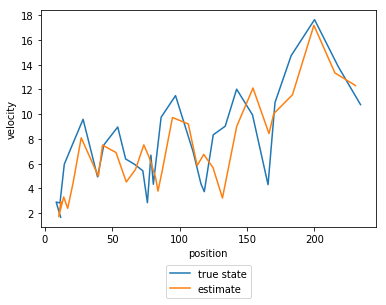

In [15]:
plt.plot(x_true[0, :], x_true[1, :], label="true state")
plt.plot(x_est[0, :], x_est[1, :], label="estimate")
plt.xlabel("position")
plt.ylabel("velocity")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))

### 2 (c) Effect of Velocity Measurements

How would the estimate change if we measured only the positions? 

To analyze this case, assume that

$$ C = \begin{bmatrix} 1 & 0 \end{bmatrix}, \ \ \ \color{red}{\Sigma_W = \begin{bmatrix} 4 \end{bmatrix}}, $$

and you only have access to $\{Y_1(n)\}_{n=1}^{30}$, which are the measurements of the position. Again using your <span style="color:blue; font-family:Courier">predict2</span> and <span style="color:blue; font-family:Courier">update2</span> functions with

$$A = \begin{bmatrix} 1& 1 \\ 0 & 1 \end{bmatrix} , \ 
\hat{\ X}(0\mid 0) \sim \mathcal N\Bigl(  \begin{bmatrix} 11 \\ 4 \end{bmatrix}, 
  \begin{bmatrix} 3& 0 \\ 0 & 2 \end{bmatrix} \Bigr), \ 
\color{red}{\Sigma_v = \begin{bmatrix} 4& 0 \\ 0 & 8 \end{bmatrix}},$$

find the estimates $\{\hat{\ X}(n\mid n)\}_{n=1}^{30}$. 

Note that $\mathbf C$ <b> and </b> $\mathbf{\Sigma_W}$ <b> have changed, and you only have access to the position measurements:</b> $\mathbf{ \{Y_1(n)\}_{n=1}^{30} }$.

In [16]:
#your code here
C = np.array([[1, 0]])
Sigma_w2 = np.array([[4]])

x_est2 = np.zeros((2, 30))
Sigma_est2 = np.zeros((30, 2, 2))
for n in range(30):
    if n == 0:
        x_0 = np.array([11, 4]).reshape(2, 1)
        Sigma_0 = np.array([[3, 0], [0, 2]])
        x_pred, Sigma_pred = predict2(A, Sigma_v, x_0, Sigma_0)
        x_upd, Sigma_upd = update2(C, Sigma_w2, x_pred, y[0, 0], Sigma_pred)
        x_est2[:, n] = x_upd.reshape(2)
        Sigma_est2[n] = Sigma_upd
    else:
        x_pred, Sigma_pred = predict2(
            A, Sigma_v, x_est2[:, n - 1].reshape(2, 1), Sigma_est2[n - 1])
        x_upd, Sigma_upd = update2(C, Sigma_w2, x_pred, y[0, n], Sigma_pred)
        x_est2[:, n] = x_upd.reshape(2)
        Sigma_est2[n] = Sigma_upd

Plot the position estimates $\{\hat{\ X}_1(n\mid n)\}_{n=1}^{30}$ given by Part 2(b) and Part 2(c) on the same plot, along with the true values <span style="font-family:Courier">x_true</span>.

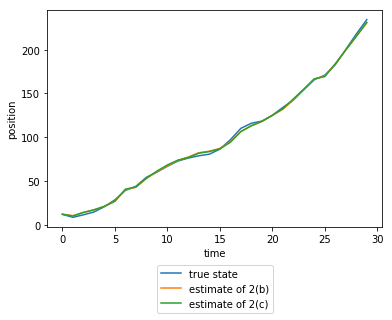

In [17]:
t = range(30)
plt.plot(t, x_true[0, :], label="true state")
plt.plot(t, x_est[0, :], label="estimate of 2(b)")
plt.plot(t, x_est2[0, :], label="estimate of 2(c)")
plt.xlabel("time")
plt.ylabel("position")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))

### 2 (d) Effect of Incomplete Model



What would happen if we assumed that the velocity of the object, $X_2(n)$, is constant at $4$ for all $n \in \{0,1,2, \dots , 30\}$, and reduced the model to

$$ X_1(n+1) = X_1(n) + 4 + V_1(n)? $$

Using the <span style="color:blue; font-family:Courier">predict</span> and <span style="color:blue; font-family:Courier">update</span> functions you wrote <b> in the water tank filling question</b> with <b>only the position measurements</b> $\{Y_1(n)\}_{n=1}^{30}$ and the parameters $a=1, u=4, \color{red}{\sigma_V^2 = 4, \sigma_W^2 = 4}$ and $\hat{\ X}_1(0\mid 0) \sim \mathcal N(11, 3)$, obtain the position estimates $\{\hat{\ X}_1(n\mid n)\}_{n=1}^{30}$. Plot the position estimates $\{\hat{\ X}_1(n\mid n)\}_{n=1}^{30}$ along with the estimates given by Part 2(c) and the true values <span style="font-family:Courier">x_true</span>. (Feel free to go back to Part (b) and generate a new trajectory <span style="font-family:Courier">x_true</span> if you cannot observe a conspicuous difference between the estimates.)

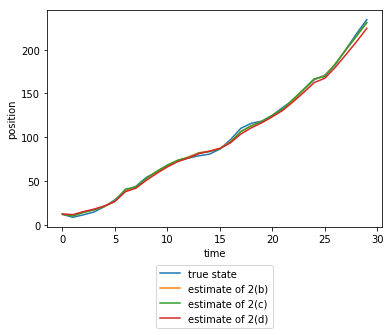

In [18]:
x_est3 = np.zeros(30)
var_est3 = np.zeros(30)
a = 1
u = 4
var_v = 4
var_w = 4

for n in range(0, 30):
    if n == 0:
        x_pred, var_pred = predict(11, 3, var_v, a, u)
        x_upd, var_upd = update(x_pred, y[0, n], var_pred, var_w)
        x_est3[n] = x_upd
        var_est3[n] = var_upd
    else:
        x_pred, var_pred = predict(x_est3[n - 1], var_est3[n - 1], var_v, a, u)
        x_upd, sigma_upd = update(x_pred, y[0, n], var_pred, var_w)
        x_est3[n] = x_upd
        var_est3[n] = var_upd
        
t = range(30)
plt.plot(t, x_true[0, :], label="true state")
plt.plot(t, x_est[0, :], label="estimate of 2(b)")
plt.plot(t, x_est2[0, :], label="estimate of 2(c)")
plt.plot(t, x_est3, label="estimate of 2(d)")
plt.xlabel("time")
plt.ylabel("position")
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))